In [34]:
import tensorflow as tf

# Checking for the gpu
print(tf.config.list_physical_devices("GPU"))

[]


In [35]:
import pandas as pd

df = pd.read_csv(
    "https://github.com/albayraktaroglu/Datasets/blob/master/churn.csv?raw=true"
)

In [36]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [37]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [38]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [39]:
df.drop(columns="State", inplace=True)

In [40]:
# extracting all the digitis from the phone number column
df["Phone"] = (
    df["Phone"].str.split("-", expand=True)[0]
    + df["Phone"].str.split("-", expand=True)[1]
)

In [41]:
df["Phone"] = df["Phone"].astype("int64")

In [42]:
num = df.select_dtypes(include=["int64", "float64"])
num.head()

,Account Length,Area Code,Phone,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,3824657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,3717191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,3581921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,3759999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,3306626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [43]:
cat = df.select_dtypes(include=["object"])
cat.head()

,Int'l Plan,VMail Plan,Churn?
0,no,yes,False.
1,no,yes,False.
2,no,no,False.
3,yes,no,False.
4,yes,no,False.


In [47]:
df["Int'l Plan"] = pd.get_dummies(cat["Int'l Plan"], drop_first=True).astype("int")
df["VMail Plan"] = pd.get_dummies(cat["VMail Plan"], drop_first=True).astype("int")

In [49]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# label encoding
from sklearn.preprocessing import LabelEncoder

In [50]:
lc = LabelEncoder()
df["Churn?"] = lc.fit_transform(df["Churn?"])

In [52]:
df.head()

,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,3824657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [53]:
# splitting the data
X = df.drop(columns="Churn?")
y = df["Churn?"]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [55]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
# Building a ANN model Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [71]:
from tensorflow.keras.layers import Dense, Dropout, Input

In [64]:
# creating the model

In [98]:
model = Sequential()

In [99]:
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [105]:
# from tensorflow.keras import backend as K


# Define the R² metric
# def r2_score(y_true, y_pred):
#     ss_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
#     ss_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
#     r2 = 1 - ss_res / (ss_tot + K.epsilon())  # Add epsilon for numerical stability
#     return r2

In [106]:
# Compile the model with R² as a metric
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_error", "accuracy"],
)

In [107]:
# summary of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# fitting the model
model.fit(x_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8630 - loss: 0.1783 - mean_absolute_error: 0.3620 - val_accuracy: 0.8390 - val_loss: 0.1251 - val_mean_absolute_error: 0.2447
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8687 - loss: 0.1056 - mean_absolute_error: 0.2030 - val_accuracy: 0.8390 - val_loss: 0.1068 - val_mean_absolute_error: 0.2161
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8610 - loss: 0.0925 - mean_absolute_error: 0.1843 - val_accuracy: 0.8390 - val_loss: 0.0973 - val_mean_absolute_error: 0.2067
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8629 - loss: 0.0881 - mean_absolute_error: 0.1702 - val_accuracy: 0.8390 - val_loss: 0.0904 - val_mean_absolute_error: 0.1539
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8673 - loss: 0.0802 - mean_absolute_error: 0.1423 - val_accuracy: 0.8801 - val_loss: 0.0921 - val_mean_absolute_error: 0.1371
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [109]:
# getting and plotting the loss and accuracy
import matplotlib.pyplot as plt

In [110]:
# getting the loss and accuracy
loss = pd.DataFrame(model.history.history)
loss.head()

,accuracy,loss,mean_absolute_error,val_accuracy,val_loss,val_mean_absolute_error
0,0.860694,0.145705,0.282551,0.838951,0.125066,0.244732
1,0.861163,0.108805,0.206967,0.838951,0.106783,0.216138
2,0.861163,0.095051,0.178890,0.838951,0.097260,0.206726
3,0.861163,0.084500,0.157884,0.838951,0.090423,0.153862
4,0.891651,0.079465,0.136770,0.880150,0.092060,0.137146


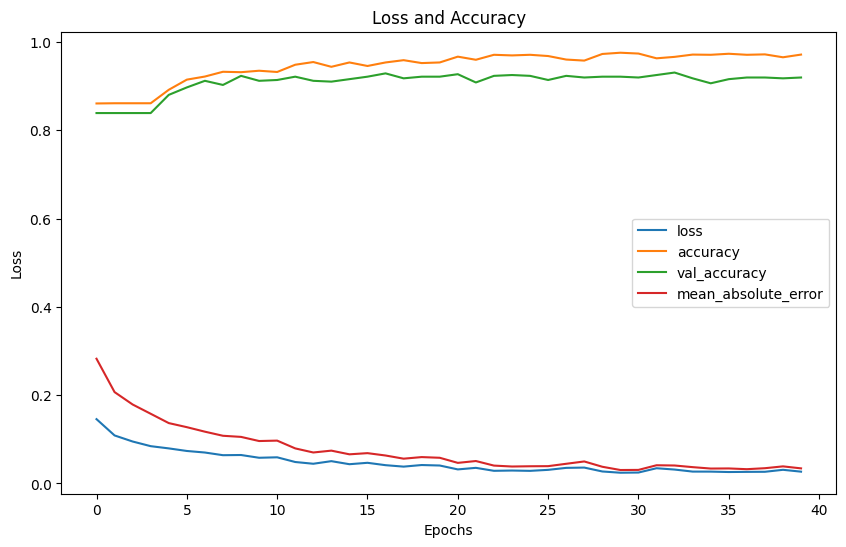

In [114]:
# plotting the loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(loss[["loss", "accuracy", "val_accuracy", "mean_absolute_error"]])
plt.title("Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["loss", "accuracy", "val_accuracy", "mean_absolute_error"])
plt.show()

In [115]:
# # plotting the loss and accuracy
# plt.figure(figsize=(10, 6))
# plt.plot(loss[["mean_absolute_error", "accuracy"]])
# plt.title("MAE and Accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(["mean_absolute_error", "accuracy"])
# plt.show()

In [117]:
pred = model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [118]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, pred.round())

array([[553,  13],
       [ 44,  57]])

In [120]:
print(classification_report(y_test, pred.round()))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       566
         1.0       0.81      0.56      0.67       101

    accuracy                           0.91       667
   macro avg       0.87      0.77      0.81       667
weighted avg       0.91      0.91      0.91       667



In [129]:
import numpy as np

# pred.round().astype("int")
# np.array(df["Churn?"])
pd.concat(
    [pd.DataFrame(pred.round().astype("int")), pd.DataFrame(df["Churn?"])], axis=1
)

,0,Churn?
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
3328,NaN,0
3329,NaN,0
3330,NaN,0
3331,NaN,0
